<h1>Project: Wrangle and Analyse data</h1>

In [2]:
import pandas as pd
import tweepy
import json
import matplotlib.pyplot as plt
from matplotlib import cm
import requests
import numpy as np
import seaborn as sns
%matplotlib inline

<h2>Gather Data</h2><br>

We first gether the data from the resources that are available to us. For this project the data is imported from the **"twitter-archive-enhanced.csv"** file, which contained the collection of twitter data the was sent by **WeRateDogs** twitter handle to Udacity.<br>

The Twitter API is used to get the additional data such as favorite count and the retweet count.The **"image-predictions.tsv"** is used to get the Image predictions data which has been done using Neural network Analysis by the instructor.

In [3]:
#loading the csv data to dataframe
twitter_archive_df = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#loading image predictions data
image_predictions_df = pd.read_csv("image-predictions.tsv", delimiter='\t')

In [5]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#secret consumer access token provided by twitter
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

#authentication and connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
#list to contains erroneous tweets (maybe missing tweets)
error_ids = []

#writing the json contents of the tweets to a text file
with open("additional_tweets_data.txt", 'w') as tweets_file:
    for each_id in twitter_archive_df['tweet_id']:
        try:
            #fetching particular tweet data
            tweet = api.get_status(each_id)
            json.dump(tweet._json, tweets_file)
            tweets_file.write("\n")
        except:
            error_ids.append(each_id)
            print("Error in fetching the tweet: {}".format(each_id))

Error in fetching the tweet: 888202515573088257
Error in fetching the tweet: 873697596434513921
Error in fetching the tweet: 872668790621863937
Error in fetching the tweet: 872261713294495745
Error in fetching the tweet: 869988702071779329
Error in fetching the tweet: 866816280283807744
Error in fetching the tweet: 861769973181624320
Error in fetching the tweet: 856602993587888130
Error in fetching the tweet: 851953902622658560
Error in fetching the tweet: 845459076796616705
Error in fetching the tweet: 844704788403113984
Error in fetching the tweet: 842892208864923648
Error in fetching the tweet: 837366284874571778
Error in fetching the tweet: 837012587749474308
Error in fetching the tweet: 829374341691346946
Error in fetching the tweet: 827228250799742977
Error in fetching the tweet: 812747805718642688
Error in fetching the tweet: 802247111496568832
Error in fetching the tweet: 775096608509886464
Error in fetching the tweet: 770743923962707968


Rate limit reached. Sleeping for: 424


Error in fetching the tweet: 754011816964026368
Error in fetching the tweet: 680055455951884288


Rate limit reached. Sleeping for: 350


In [6]:
#list to contain the data retrived using API
tweet_api_data = []

#extracting favorite count and retweet count from the json file
with open('additional_tweets_data.txt', 'r') as additional_json:
    # read the first line to start the loop
    line = additional_json.readline()
    while line:
        data = json.loads(line)

        # extract values from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_api_data.append(json_data)

        # read the next line of JSON data
        line = additional_json.readline()

# convert the tweet JSON data dictionary list to a DataFrame
additional_data_df = pd.DataFrame(tweet_api_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

In [7]:
additional_data_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8034,37364
1,892177421306343426,5963,32111
2,891815181378084864,3946,24216
3,891689557279858688,8190,40657
4,891327558926688256,8882,38879


In [8]:
additional_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
retweet_count     2334 non-null int64
favorite_count    2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


We can notice that there are no missing values in the data that was retrieved using the twitter API. Ther are 2334 records in the API data.

In [9]:
#storing the datafraame to a CSV file
additional_data_df.to_csv("twitter_api_data.csv",index=False)

<h2> Assess Data</h2><br>

Since we have finished gathering all the required data, we first assess as to check if all the data that was received is right and if ther si faulty data. This can be done by checking the properties and the values in the dataset for faults. This is very important for accurate Anlaysis and visualization.

In [14]:
twitter_archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


We can notice a lot of **NaN** in the dataset for in_reply and retweet fields. These might not be useful if too many are missing. This can be checked by the info command.  

In [18]:
#set display optiion to see entire content of 'text' field
pd.set_option('display.max_colwidth', -1)

In [22]:
#check the retweets. There are to be removed as they are not useful
twitter_archive_df[twitter_archive_df.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [16]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are only **181** records for retweet fields. Hence we can decide to **delete the non-empty retweet_status_id rows and the reweet related columns** as they could not be of use to us when compared to the size of the dataset.

In [19]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
#count of all the diffent denominator values
# the denominator should be a standard ie., 10
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
#all the different numerator counts
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
#checking for duplicate records. seems to be 0.
sum(twitter_archive_df.duplicated())

0

In [46]:
#checking the values in dog stage pupper
twitter_archive_df.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [47]:
#checking the values in dog stage pupper
twitter_archive_df.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [54]:
#checking the dog names for lower case
twitter_archive_cleaned[twitter_archive_cleaned.name.str.islower()][['tweet_id','name']]

,tweet_id,name
22,887517139158093824,such
56,881536004380872706,a
169,859196978902773760,quite
193,855459453768019968,quite
335,832645525019123713,not
369,828650029636317184,one
542,806219024703037440,incredibly
649,792913359805018113,a
801,772581559778025472,a
819,770655142660169732,very


We can notice that there are a lot of different words like 'a', 'an, 'quite', 'incredibly'. These are the incorrect names for a dog and hence will have to be converted to a 'None' value.

In [26]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
image_predictions_df.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [28]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The image predictions has no missing values, hence we could consider the entire data set. This makes our job easier since we need not delete unnecessary data. However, all three predictions may not be useful to us.

In [29]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
image_predictions_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
teddy                         18
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [31]:
additional_data_df.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8034,37364
1,892177421306343426,5963,32111
2,891815181378084864,3946,24216
3,891689557279858688,8190,40657
4,891327558926688256,8882,38879
5,891087950875897856,2954,19552
6,890971913173991426,1951,11412
7,890729181411237888,17913,62977
8,890609185150312448,4055,26885
9,890240255349198849,6987,30813


In [32]:
additional_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
retweet_count     2334 non-null int64
favorite_count    2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [33]:
sum(additional_data_df.duplicated())

0

In [35]:
additional_data_df.sort_values(['favorite_count'], ascending= 0)[0:5]

,tweet_id,retweet_count,favorite_count
1018,744234799360020481,81139,161326
397,822872901745569793,45945,137522
517,807106840509214720,59165,124640
129,866450705531457537,34334,119875
1058,739238157791694849,60127,119195


<h3>Issues identified</h3>

**Quality Issues:**<br>
1. The rating_denominator should have a standard throughout to be 10. There are various other values, which is erroneous.
2. The rating_numerator has manu erronous values, like in 100s.
3. the datatype of timestamp should be datetime and not string.
4. The are wrong dog names mentioned like 'a', 'an'.
5. The rows that contain non-empty 'retweeted_status_id'  need to be removed as these are retweets.
6. Columns like 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'in_reply_to_user_id' have lot of missing values. The columns are not useful in the analysis and can be dropped.
7. The 'expanded_url' column has a few missing values. This suggests that there are no images in the tweets. These tweets cannot be considered for analysis.
8. There are urls in the text which is not readable for user. This needs to be reduced to text only.
9. The columns names like p1,p2 are not clear Image predictions.

<br>

**Tidiness Issues**<br>
1. The favorite_count and retweet_count need to belong to the same dataframe.
2. Columns 'doggo', 'floofer', 'pupper', 'puppo' in twitter_archive_df should belong to one colomn, maybe dog_stage.


<h2>Data Cleaning</h2><br>

All the issues identifies are to be fixed in this section for accurate Analysis. 

In [147]:
#Lets keep copies of the dataframe
twitter_archive_cleaned = twitter_archive_df.copy()
image_predictions_cleaned = image_predictions_df.copy()

In [148]:
tweet_data_cleaned = additional_data_df.copy()

**Define**<br>
**Quality 5: The rows that contain non-empty 'retweeted_status_id' need to be removed as these are retweets**

I am doing this first so that the removed retweets will reduce the numerator_ratings cleaning efforts. 

**Code:**

In [149]:
#count of the total number of non-null values of retweet_id
len(twitter_archive_cleaned[twitter_archive_cleaned.retweeted_status_id.isnull()])

2175

In [150]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The total of 2175 matches the total count of null retweet ids because we observed a total of 181 non-null retweet_ids in the main dataset. So **2356 - 181 = 2175 does match the total null retweet_ids**.

In [151]:
# dropping the non-null records of retweet_status_id
# ie, considering only the records with retweet_status_id as null.
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned.retweeted_status_id.isnull()]

**Test** - check if non-null retweet records exist

In [152]:
# check if all retweet ids are null 
len(twitter_archive_cleaned[twitter_archive_cleaned.retweeted_status_id.notnull()])

0

In [153]:
# check if retweet_timestamp is not null for all records
len(twitter_archive_cleaned[twitter_archive_cleaned.retweeted_status_timestamp.notnull()])

0

In [154]:
# check if retweet_user_id is not null for all records
len(twitter_archive_cleaned[twitter_archive_cleaned.retweeted_status_user_id.notnull()])

0

**Define:**<br>
**Quality 6: Columns like 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'in_reply_to_user_id' have lot of missing values. The columns are not useful in the analysis and can be dropped.**

**Code:**

In [155]:
#list of columns names to drop
list_of_coulumns_being_dropped = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                  'in_reply_to_status_id','in_reply_to_user_id', 'in_reply_to_user_id']

In [156]:
#dropping the columns
twitter_archive_cleaned.drop(list_of_coulumns_being_dropped, axis = 1, inplace = True)

**Test**

In [157]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


**Define:**<br>**Quality 1: The rating_denominator should have a standard throughout to be 10. There are various other values, which is erroneous**

In [158]:
#check denominators that are not 10
faulty_denominator = twitter_archive_cleaned[twitter_archive_cleaned.rating_denominator != 10]

In [159]:
faulty_denominator[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


In [160]:
#manually setting the field of denominators to 10 after inspecting the tweets text. 
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 775096608509886464, ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 740373189193256964, ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 722974582966214656, ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 716439118184652801, ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 682962037429899265, ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 666287406224695296, ['rating_denominator']] = 10

In [161]:
#there are not 17 records remaining with faulty denominator
len(twitter_archive_cleaned.query("rating_denominator != 10")['tweet_id'])

17

**Define:**<br>**Quality 2: The rating_numerator has manu erronous values, like in 100s.**

There are many numerators in decimals that have been missed. like 9.75 for the index 695

In [162]:
# a look at the faulty ratings

faulty_numerator = twitter_archive_cleaned.query("rating_numerator > 15 or rating_denominator != 10")
faulty_numerator[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [163]:
ratings = twitter_archive_cleaned.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [164]:
ratings[ratings[0] == '9.75']

,0,1
695,9.75,10


In [165]:
twitter_archive_cleaned.rating_numerator = ratings[0]
twitter_archive_cleaned.rating_denominator = ratings[1]

In [166]:
twitter_archive_cleaned.rating_numerator = twitter_archive_cleaned.rating_numerator.astype(float)
twitter_archive_cleaned.rating_denominator = twitter_archive_cleaned.rating_denominator.astype(float)

In [167]:
# manually change numerators from the tweets text if available
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 740373189193256964, ['rating_numerator']] = 14
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 722974582966214656, ['rating_numerator']] = 13
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 716439118184652801, ['rating_numerator']] = 11
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 682962037429899265, ['rating_numerator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 666287406224695296, ['rating_numerator']] = 9

**Test**

In [215]:
#checking if float comparisons working fine
twitter_archive_cleaned[twitter_archive_cleaned.rating_numerator ==9.75]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
527,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,,6489,19134


In [169]:
faulty_records = twitter_archive_cleaned.query("rating_numerator > 15")

In [170]:
len(faulty_records)

21

There are few faults in the data remaining. We may not find there ratings useful in the remaining analysis. The values can give outbound markings on the graph. We Hence replace there faulty numerator by None

In [171]:
# replace all the numerator > 15 by None so that they are not considered for analysis
mask = twitter_archive_cleaned.rating_numerator > 14
twitter_archive_cleaned.loc[mask,'rating_numerator'] = None

In [172]:
# replace all numerators by None if the denominator is not 10
mask = twitter_archive_cleaned.rating_denominator != 10
twitter_archive_cleaned.loc[mask, ['rating_numerator','rating_denominator']] = None

In [173]:
# check if any numerators > 15 exists
len(twitter_archive_cleaned.query("rating_numerator > 15"))

0

Now we notice that ther are no faulty numerator values. Hence we can take the numerator ratings for doing analysis on the plots.

**Define:**<br>**Quality 3: The datatype of timestamp should be datetime and not string.**

**Code:**

In [174]:
#using to_datetime to covert the values
twitter_archive_cleaned['timestamp'] = pd.to_datetime(twitter_archive_cleaned['timestamp'])

**Test**

In [175]:
twitter_archive_cleaned.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

**Define:**<br>**Quality 4: The are wrong dog names mentioned like 'a', 'an'.**

In [176]:
#count of names
twitter_archive_cleaned[twitter_archive_cleaned.name.str.islower()][['tweet_id','name']]

,tweet_id,name
22,887517139158093824,such
56,881536004380872706,a
169,859196978902773760,quite
193,855459453768019968,quite
335,832645525019123713,not
369,828650029636317184,one
542,806219024703037440,incredibly
649,792913359805018113,a
801,772581559778025472,a
819,770655142660169732,very


**Code:**

In [177]:
#replacing wrong names with None
twitter_archive_cleaned.name.mask(twitter_archive_cleaned.name.str.islower(), inplace=True)

**Test:**

In [178]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2146 non-null float64
rating_denominator    2153 non-null float64
name                  2071 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 220.9+ KB


We can notice that the number of Non-null has decreased for 'name' showing that all the lowercase names havve been converted to Null.

In [179]:
#checking the count of names with lower letters
twitter_archive_cleaned.name.str.islower().sum()

0

**Define:**<br>
**Quality 7: The 'expanded_url' column has a few missing values. This suggests that there are no images in the tweets. These tweets cannot be considered for analysis.**

**Code:**

In [180]:
#dropping the records with no images
twitter_archive_cleaned = twitter_archive_cleaned.dropna(subset = ['expanded_urls'])

**Test**

In [181]:
twitter_archive_cleaned.shape

(2117, 12)

In [182]:
#checking for any missing image tweet
twitter_archive_cleaned.expanded_urls.isnull().sum()

0

**Define:**<br>**Quality 8 : There are urls in the 'source' which is not readable for user. This needs to be reduced to text only.**

**Code:**

In [183]:
#count of sources
twitter_archive_cleaned.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1985
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     30  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [184]:
values_to_replace = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                     '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

new_values = ['Twitter for iPhone','Vine - Make a Scene','Twitter Web Client','TweetDeck']

In [185]:
#replace URLS with new text
twitter_archive_cleaned.replace(values_to_replace, new_values, inplace=True)

**Test:**

In [186]:
#check the new readble texts count
twitter_archive_cleaned.source.value_counts()

Twitter for iPhone     1985
Vine - Make a Scene    91  
Twitter Web Client     30  
TweetDeck              11  
Name: source, dtype: int64

**Define:**<br>**Quality 9: The columns names like p1,p2 are not clear Image predictions.**

**Code:**

In [187]:
image_predictions_cleaned.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [188]:
# change the column names
image_predictions_cleaned.rename(columns={'p1':'prediction_1', 'p1_conf': 'first_confidence', 'p1_dog': 'dog_breed_1',
                                  'p2': 'prediction_2', 'p2_conf': 'second_confidence', 'p2_dog': 'dog_breed_2',
                                  'p3': 'prediction_3', 'p3_conf': 'third_confidence', 'p3_dog': 'dog_breed_3'},
                                 inplace = True)

**Test:**

In [189]:
image_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             2075 non-null int64
jpg_url              2075 non-null object
img_num              2075 non-null int64
prediction_1         2075 non-null object
first_confidence     2075 non-null float64
dog_breed_1          2075 non-null bool
prediction_2         2075 non-null object
second_confidence    2075 non-null float64
dog_breed_2          2075 non-null bool
prediction_3         2075 non-null object
third_confidence     2075 non-null float64
dog_breed_3          2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<h3>Resolving Tidiness Issues</h3>

**Define:**<br>**Tidiness Issues 1 : Columns 'doggo', 'floofer', 'pupper', 'puppo' in twitter_archive_df should belong to one colomn, maybe dog_stage.**

Printing the value count of all the possible values of each dog stage column that we have. This gives an understanding if the columns need to be merged.

In [190]:
twitter_archive_cleaned.puppo.value_counts()

None     2093
puppo    24  
Name: puppo, dtype: int64

In [191]:
twitter_archive_cleaned.pupper.value_counts()

None      1885
pupper    232 
Name: pupper, dtype: int64

In [192]:
twitter_archive_cleaned.doggo.value_counts()

None     2033
doggo    84  
Name: doggo, dtype: int64

In [193]:
twitter_archive_cleaned.floofer.value_counts()

None       2107
floofer    10  
Name: floofer, dtype: int64

**Code:**

In [194]:
#store stages in list for iteration
#replacing None with '', so that we can concatenate the values into one column
stages = ['puppo','pupper', 'doggo', 'floofer']
for each in stages:
    twitter_archive_cleaned[each] = twitter_archive_cleaned[each].replace('None', '')

In [195]:
#concatenating the columns
twitter_archive_cleaned['dog_stage'] = twitter_archive_cleaned.pupper + twitter_archive_cleaned.puppo + twitter_archive_cleaned.floofer + twitter_archive_cleaned.doggo

In [196]:
#dropping the original 4 columns
twitter_archive_cleaned.drop(columns=['puppo','pupper', 'doggo', 'floofer'], inplace=True)

**Test:**

In [197]:
twitter_archive_cleaned.dog_stage.value_counts()

                1779
pupper          222 
doggo           72  
puppo           23  
pupperdoggo     10  
floofer         9   
flooferdoggo    1   
puppodoggo      1   
Name: dog_stage, dtype: int64

**Define:**<br>**Tidiness Issue 2: The favorite_count and retweet_count need to belong to the same dataframe.**

**Code:**

In [198]:
tweet_data_cleaned.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8034,37364
1,892177421306343426,5963,32111
2,891815181378084864,3946,24216
3,891689557279858688,8190,40657
4,891327558926688256,8882,38879


In [199]:
#twitter archve shape 
twitter_archive_cleaned.shape

(2117, 9)

In [200]:
#additional data shape
tweet_data_cleaned.shape

(2334, 3)

In [201]:
# merging the data
twitter_archive_cleaned = pd.merge(twitter_archive_cleaned, tweet_data_cleaned, on='tweet_id', how = 'inner')

**Test:**

In [202]:
twitter_archive_cleaned.shape

(2111, 11)

In [203]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2111 entries, 0 to 2110
Data columns (total 11 columns):
tweet_id              2111 non-null int64
timestamp             2111 non-null datetime64[ns]
source                2111 non-null object
text                  2111 non-null object
expanded_urls         2111 non-null object
rating_numerator      2091 non-null float64
rating_denominator    2093 non-null float64
name                  2007 non-null object
dog_stage             2111 non-null object
retweet_count         2111 non-null int64
favorite_count        2111 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 197.9+ KB


After merging, we see that there are no null values. The shows that merging has happened rightly as per inner join standards.

In [204]:
twitter_archive_cleaned.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,,8034,37364
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,,5963,32111
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,,3946,24216
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,,8190,40657
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,,8882,38879


**Storing the cleaned dataframe to a CSV file**

In [205]:
#storing the data frame to CSV
twitter_archive_cleaned.to_csv('twitter_archive_updated.csv', encoding='utf-8')

<h2>Data Analysis and Visualization</h2>

**Distribution of Numerator across scale:**

In [206]:
# subset dataframe to obtain rows that have ratings 15 and below
df_numerator = twitter_archive_cleaned[(twitter_archive_cleaned.rating_numerator <= 15)]
                           
numerator_values = df_numerator.groupby(['rating_numerator']).count()['tweet_id']

In [207]:
numerator_values

rating_numerator
0.00     2  
1.00     4  
2.00     9  
3.00     19 
4.00     15 
5.00     33 
6.00     32 
7.00     51 
8.00     98 
9.00     153
9.75     1  
10.00    435
11.00    417
11.26    1  
11.27    1  
12.00    488
13.00    291
13.50    1  
14.00    40 
Name: tweet_id, dtype: int64

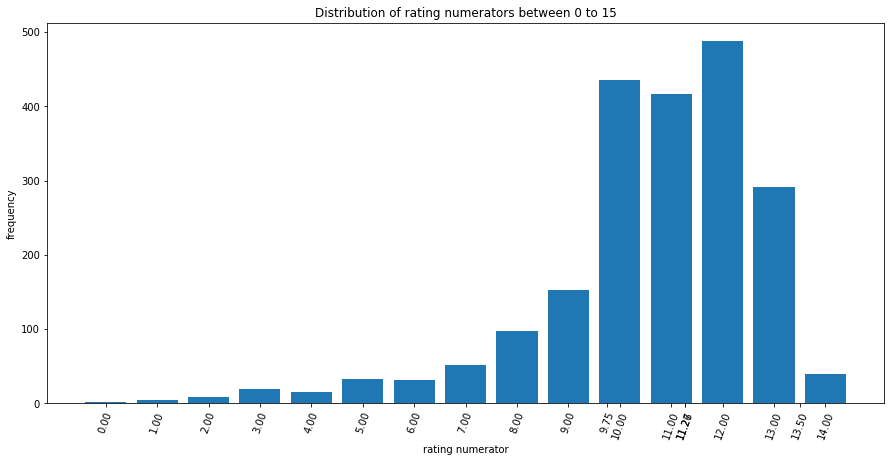

In [223]:
# plot the bar charts for distribution of rating numerators between 0 to 15
plt.figure(figsize=(15,7))
plt.bar(numerator_values.index,numerator_values)
plt.xticks(numerator_values.index, rotation = 70)
plt.xlabel('rating numerator')
plt.ylabel('frequency')
plt.title('Distribution of rating numerators between 0 to 15');

It is noticed that the rating given by the handle is almost in the range 9 - 13. This shows that they are very positive hearted towards the Dogs and are mostly here to share the interesting pictures of Dogs and not to criticize and dogs in general. The lower rating counld be when the  picture was very average and did not seem extra-ordinary. But this count is very less.

**Distribution of Dog stages**

Text(0.5, 1.0, 'The Distribution of Dog Stages')

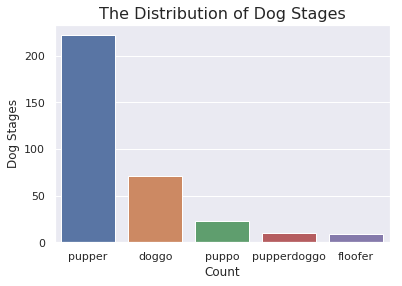

In [224]:
sorted_stage = twitter_archive_cleaned.query("dog_stage != ''")['dog_stage'].value_counts().head().index
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_cleaned, x = 'dog_stage', order = sorted_stage, orient = 'h')
plt.xlabel('Count')
plt.ylabel('Dog Stages')
plt.title('The Distribution of Dog Stages',fontsize=16)

Most of the dogs posted were 'Puppers'. There were a lot of missing data, hence this plot is of all the data that is available for this comparison. 'Doggo' was the second most prominant followed by 'Pupppo'.

In [229]:
ratings_df = twitter_archive_cleaned.query("favorite_count!=0 and retweet_count!= 0")

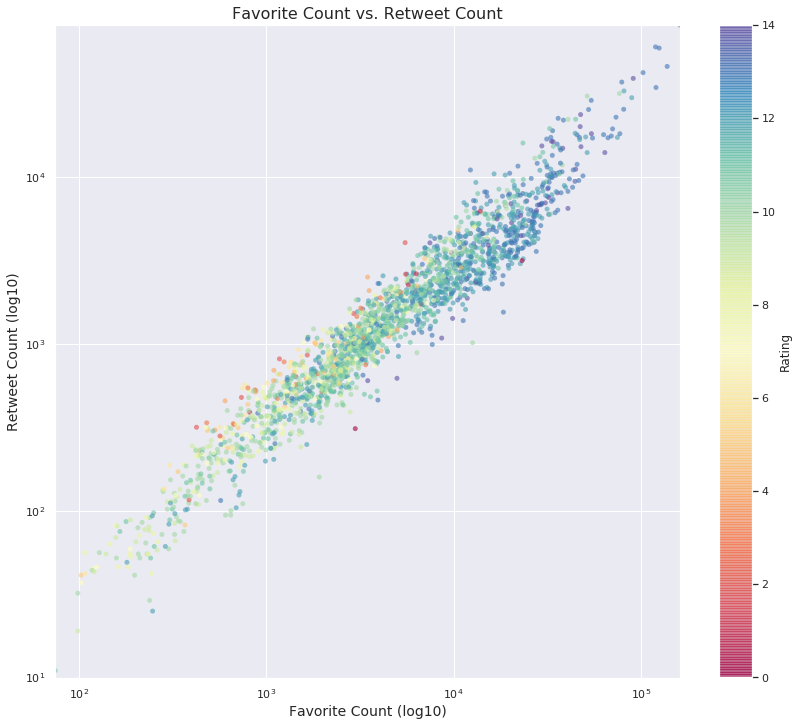

In [230]:
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 12))

plt.xscale('log')
plt.yscale('log')
plt.xlim(ratings_df['favorite_count'].min() , ratings_df['favorite_count'].max())
plt.ylim(10, ratings_df['retweet_count'].max())

colours = ratings_df['rating_numerator']
markers = 25

plt.scatter(ratings_df['favorite_count'], ratings_df['retweet_count'], 
             c=colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.title('Favorite Count vs. Retweet Count', fontsize = 16)
plt.xlabel('Favorite Count (log10)', fontsize = 14)
plt.ylabel('Retweet Count (log10)', fontsize = 14)

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating')

plt.show();

The above graph shows us the direct correlation between the favorite count and the retweet count. We notice that as the favorite count increases, the retweets have increased. In the graph, the darker colors show the higher raings. Though the rating is spread across the favorite count, most of the low rating is in the are where the favorite count is less. So, in a way, rating count is also directly proportional to the favorite count.

We do see some red dots her and there, but they are very less in number. It count be possible that they were not liked by the critics but liked by the people, in case we see higher favorite count for low rated dogs.

In [231]:
brent_meme_date = pd.to_datetime('2016-9-12')

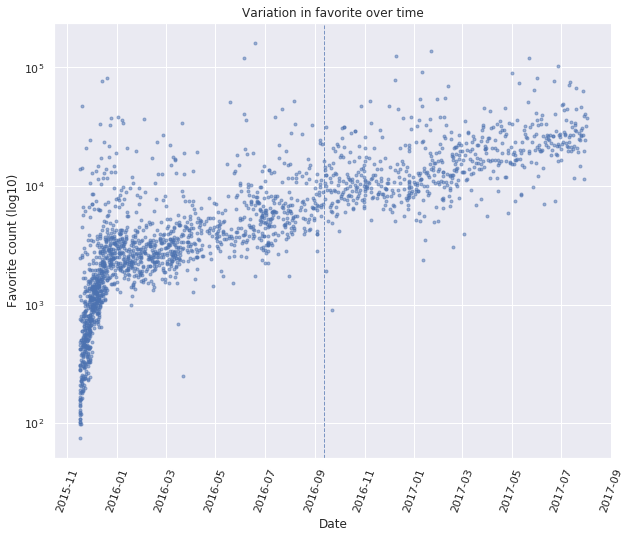

In [232]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(ratings_df.timestamp, ratings_df.favorite_count, alpha=0.5, ms=3)
# log transform the scale
ax.set_yscale('log')
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.ylabel('Favorite count (log10)')
plt.title('Variation in favorite over time')
plt.axvline(brent_meme_date, lw=1, ls='dashed', alpha=0.7);


Since we have tweets starting from November 2015, the above graph gives a clear picture of the popularity of the 'WeRateDogs' handle. It ratpidly increased between November 2015 and January 2016. then ther was a steady increase in the favorite count.

We can note here that the channel was already popular when the 'Dogs are good Brent' meme came out. The meme has had no direct effect on the popularity of the page. In fact we could say the due to the popularity of he page, the meme could have got popular. Hence 'Brent' episode did not improve popularity as such.